In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers, callbacks
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore', category=Warning)


In [ ]:
import os

# Specify the folder path
folder_path = "/content/drive/MyDrive/data/"

# Error handling: Check if folder exists
if not os.path.exists(folder_path):
    raise ValueError(f"Folder '{folder_path}' does not exist. Please provide a valid path.")

# Create an empty list to store the files
trials = []

# Iterate through files in the folder using os.listdir()
for filename in os.listdir(folder_path):
    # Check if it's a file (not a directory) using os.path.isfile()
    if os.path.isfile(os.path.join(folder_path, filename)):
        # Construct the full path to the file
        full_path = os.path.join(folder_path, filename)

        data = pd.read_csv(full_path, header=None)

        # Process the data
        print(f"Processing file: {filename}")
        trials.append(data)

Processing file: ss_0_1.csv
Processing file: ss_0_2.csv
Processing file: ss_0_3.csv
Processing file: ss_0_4.csv
Processing file: ss_0_5.csv
Processing file: ss_0_6.csv
Processing file: ss_0_7.csv
Processing file: ss_0_8.csv
Processing file: ss_0_9.csv
Processing file: ss_0_10.csv
Processing file: ss_0_11.csv
Processing file: ss_0_12.csv
Processing file: ss_0_13.csv
Processing file: ss_1_1.csv
Processing file: ss_0_15.csv
Processing file: ss_0_14.csv
Processing file: ss_1_2.csv
Processing file: ss_1_3.csv
Processing file: ss_1_4.csv
Processing file: ss_1_5.csv
Processing file: ss_1_6.csv
Processing file: ss_1_8.csv
Processing file: ss_1_7.csv
Processing file: ss_1_9.csv
Processing file: ss_1_10.csv
Processing file: ss_1_11.csv
Processing file: ss_1_12.csv
Processing file: ss_1_13.csv
Processing file: ss_2_4.csv
Processing file: ss_2_1.csv
Processing file: ss_2_5.csv
Processing file: ss_1_15.csv
Processing file: ss_1_14.csv
Processing file: ss_2_2.csv
Processing file: ss_2_6.csv
Processi

In [ ]:
#Zero padding applied
import numpy as np


max_samples = max(trial.shape[1] for trial in trials)

sample = np.zeros((len(trials), 62, max_samples))

for i, trial in enumerate(trials):
  padding_length = max_samples - trial.shape[1]
  sample[i, :, :] = np.pad(trial, ((0, 0), (0, padding_length)), mode='constant', constant_values=0)

print(sample.shape)


(240, 62, 59400)


In [ ]:

labels = ["Happy", "Fear", "Neutral", "Sad", "Disgust",
          "Happy", "Fear", "Neutral", "Sad", "Disgust",
          "Happy", "Fear", "Neutral", "Sad", "Disgust"]*16


print(labels)


['Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad'

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(sample, labels, test_size=.2, random_state=42)

# KFold cross-validation loop
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cvscores = []  # To store evaluation metrics

for train_index, val_index in kfold.split(X_train):
  # Split the training data further for train and validation sets within each fold
  X_train_fold = [X_train[i] for i in train_index]
  X_val_fold = [X_train[i] for i in val_index]
  y_train_fold = [y_train[i] for i in train_index]
  y_val_fold = [y_train[i] for i in val_index]


X_train_fold = np.array(X_train_fold)
X_val_fold = np.array(X_val_fold)
y_train_fold = np.array(y_train_fold)
y_val_fold = np.array(y_val_fold)


In [ ]:
#Scaling
scaler = StandardScaler()
for x in X_train_fold:
  scaler.fit(x[:, 1:])

X_train_fold_scaled = []
for x in X_train_fold:
  X_train_fold_scaled.append(scaler.transform(x[:, 1:]))
X_train_fold_scaled = np.array(X_train_fold_scaled)

X_te = []
for x in X_test:
  X_te.append(scaler.transform(x[:, 1:]))
x_test = np.array(X_te)

X_val = []
for x in X_val_fold:
  X_val.append(scaler.transform(x[:, 1:]))
X_val_fold = np.array(X_val)





In [ ]:
print(X_train_fold_scaled.shape)
print(X_val_fold.shape)
print(x_test.shape)

(154, 20, 19799)
(38, 20, 19799)
(48, 20, 19799)


In [ ]:
#One Hot Encoding
encoder = OneHotEncoder(sparse=False)
encoder.fit(np.array(y_train_fold).reshape(-1, 1))
y_train_fold_encoded = encoder.transform(np.array(y_train_fold).reshape(-1, 1))
y_test = encoder.transform(np.array(y_test).reshape(-1, 1))
y_val_fold = encoder.transform(np.array(y_val_fold).reshape(-1, 1))

In [ ]:
print(y_train_fold_encoded.shape)
print(y_test.shape)
print(y_val_fold.shape)

(154, 5)
(48, 5)
(38, 5)


In [ ]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(X_train_fold_scaled.shape[1],X_train_fold_scaled.shape[2])),  # RNN layer with 8 units
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])



In [ ]:
model2 = tf.keras.models.Sequential([

    tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(X_train_fold_scaled.shape[1],X_train_fold_scaled.shape[2])),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])


In [ ]:
optimizer = optimizers.Adam()
model.compile(loss="categorical_crossentropy", optimizer=optimizer,metrics=['acc',tf.keras.metrics.Recall(),tf.keras.metrics.AUC(),tf.keras.metrics.Precision()])

In [ ]:
optimizer = optimizers.Adam()
model2.compile(loss="categorical_crossentropy", optimizer=optimizer,metrics=['acc',tf.keras.metrics.Recall(),tf.keras.metrics.AUC(),tf.keras.metrics.Precision()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 62, 128)           7603200   
                                                                 
 batch_normalization (Batch  (None, 62, 128)           512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 62, 128)           0         
                                                                 
 flatten (Flatten)           (None, 7936)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 39685     
                                                                 
Total params: 7643397 (29.16 MB)
Trainable params: 7643141 (29.16 MB)
Non-trainable params: 256 (1.00 KB)
________________

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 62, 128)           7603200   
                                                                 
 batch_normalization_1 (Bat  (None, 62, 128)           512       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 62, 128)           0         
                                                                 
 dense_3 (Dense)             (None, 62, 128)           16512     
                                                                 
 batch_normalization_2 (Bat  (None, 62, 128)           512       
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 62, 128)          

In [ ]:
tf.keras.utils.plot_model(model,show_shapes = True, to_file='model.png')

In [ ]:
tf.keras.utils.plot_model(model2,show_shapes = True, to_file='model.png')

In [ ]:
y_val_fold

array(['Happy', 'Happy', 'Neutral', 'Disgust', 'Fear', 'Fear', 'Neutral',
       'Sad', 'Fear', 'Sad', 'Neutral', 'Happy', 'Sad', 'Fear', 'Sad',
       'Happy', 'Fear', 'Happy', 'Sad', 'Neutral', 'Happy', 'Neutral',
       'Sad', 'Sad', 'Sad', 'Sad', 'Disgust', 'Disgust', 'Disgust', 'Sad',
       'Sad', 'Neutral', 'Fear', 'Disgust', 'Happy', 'Sad', 'Disgust',
       'Neutral'], dtype='<U7')

In [ ]:
checkpoint = callbacks.ModelCheckpoint('DNN_padmodel_detect_emotional.h5', save_best_only=True, verbose=1, monitor='val_loss')
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_delta=0.00001, verbose=1)
csv_logger = callbacks.CSVLogger('training.log')
callbacks_list = [checkpoint, reduce_lr, csv_logger, early_stopping]

In [ ]:
checkpoint2 = callbacks.ModelCheckpoint('DNN _padmodel_detect_emotional.h5', save_best_only=True, verbose=1, monitor='val_loss')
early_stopping2 = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr2 = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_delta=0.00001, verbose=1)
csv_logger2 = callbacks.CSVLogger('training.log')
callbacks_list2 = [checkpoint2, reduce_lr2, csv_logger2, early_stopping2]

In [ ]:
#Zero Padding metrics Model 1
history =   model.fit(X_train_fold_scaled, y_train_fold_encoded, epochs=100, validation_data=(X_val_fold, y_val_fold), callbacks = callbacks_list).history

Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 2.0937 - acc: 0.3295 - recall: 0.2428 - auc: 0.6011 - precision: 0.3500
Epoch 1: val_loss improved from inf to 8.94892, saving model to RNN_padmodel_detect_emotional.h5
6/6 [==============================] - 6s 661ms/step - loss: 2.0937 - acc: 0.3295 - recall: 0.2428 - auc: 0.6011 - precision: 0.3500 - val_loss: 8.9489 - val_acc: 0.3684 - val_recall: 0.3684 - val_auc: 0.6676 - val_precision: 0.3684 - lr: 0.0010
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 0.4617 - acc: 0.8439 - recall: 0.7861 - auc: 0.9732 - precision: 0.8774
Epoch 2: val_loss improved from 8.94892 to 6.91753, saving model to RNN_padmodel_detect_emotional.h5
6/6 [==============================] - 3s 546ms/step - loss: 0.4617 - acc: 0.8439 - recall: 0.7861 - auc: 0.9732 - precision: 0.8774 - val_loss: 6.9175 - val_acc: 0.4211 - val_recall: 0.4211 - val_auc: 0.6756 - val_precision: 0.4444 - lr: 0.0010
Epoch 3/100
6/6 [===============

In [ ]:
  loss, fold_accuracy,a,a2,a1 = model.evaluate(X_val_fold, y_val_fold)
  cvscores.append(fold_accuracy)

# Print the average accuracy across all folds
print(f"K-Fold Cross-Validation Accuracy: {np.mean(cvscores)}")

1/1 [==============================] - 0s 355ms/step - loss: 1.7372 - acc: 0.6842 - recall: 0.6316 - auc: 0.7961 - precision: 0.7059
K-Fold Cross-Validation Accuracy: 0.6052631735801697


In [ ]:
#Zero Padding metrics Model 2

history2 =   model2.fit(X_train_fold_scaled, y_train_fold_encoded, epochs=100, validation_data=(X_val_fold, y_val_fold),callbacks = callbacks_list2).history

Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 2.6125 - acc: 0.3064 - recall_1: 0.2197 - auc_1: 0.5603 - precision_1: 0.3040
Epoch 1: val_loss improved from inf to 12.60784, saving model to RNN _padmodel_detect_emotional.h5
6/6 [==============================] - 7s 724ms/step - loss: 2.6125 - acc: 0.3064 - recall_1: 0.2197 - auc_1: 0.5603 - precision_1: 0.3040 - val_loss: 12.6078 - val_acc: 0.2632 - val_recall_1: 0.2632 - val_auc_1: 0.5744 - val_precision_1: 0.2632 - lr: 0.0010
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 0.8010 - acc: 0.7168 - recall_1: 0.6705 - auc_1: 0.9332 - precision_1: 0.7436
Epoch 2: val_loss improved from 12.60784 to 9.48534, saving model to RNN _padmodel_detect_emotional.h5
6/6 [==============================] - 3s 510ms/step - loss: 0.8010 - acc: 0.7168 - recall_1: 0.6705 - auc_1: 0.9332 - precision_1: 0.7436 - val_loss: 9.4853 - val_acc: 0.1579 - val_recall_1: 0.1579 - val_auc_1: 0.5533 - val_precision_1: 0.1579 - lr

In [ ]:
  loss1, fold_accuracy,c,v,b = model2.evaluate(X_val_fold, y_val_fold)
  cvscores.append(fold_accuracy)

# Print the average accuracy across all folds
print(f"K-Fold Cross-Validation Accuracy: {np.mean(cvscores)}")

1/1 [==============================] - 0s 363ms/step - loss: 1.7781 - acc: 0.5263 - recall_1: 0.4737 - auc_1: 0.7947 - precision_1: 0.5294
K-Fold Cross-Validation Accuracy: 0.5263158082962036


In [ ]:
loss,acc,rec,auc,pre=model.evaluate(x_test, y_test)
loss2,acc2,rec2,auc2,pre2=model2.evaluate(x_test, y_test)

1/1 [==============================] - 0s 361ms/step - loss: 1.7781 - acc: 0.5263 - recall_1: 0.4737 - auc_1: 0.7947 - precision_1: 0.5294


In [ ]:
from sklearn.metrics import classification_report
#Zero Padding metrics Model 1 classification report

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Generate classification report
report = classification_report(y_test.argmax(axis=1), y_pred_classes, output_dict=True)  # Convert one-hot labels to class labels

# Print the classification report
print("Classification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred_classes))

# Access specific metrics
precision = report['accuracy']  # Overall accuracy
recall = report['weighted avg']['recall']  # Average recall
f1_score = report['weighted avg']['f1-score']  # Average F1-score

# Print specific metrics
print(f"Overall Accuracy: {precision}")
print(f"Average Recall: {recall}")
print(f"Average F1-Score: {f1_score}")

1/1 [==============================] - 0s 351ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         2
           2       1.00      0.75      0.86         4
           3       0.43      1.00      0.60         3
           4       0.80      0.57      0.67         7

    accuracy                           0.68        19
   macro avg       0.60      0.66      0.60        19
weighted avg       0.69      0.68      0.66        19

Overall Accuracy: 0.6842105263157895
Average Recall: 0.6842105263157895
Average F1-Score: 0.6561403508771929


In [ ]:
#Zero Padding metrics Model 2 classification report

y_pred1 = model2.predict(x_test)
y_pred_classes = np.argmax(y_pred1, axis=1)
# Generate classification report
report = classification_report(y_test.argmax(axis=1), y_pred_classes, output_dict=True)  # Convert one-hot labels to class labels

# Print the classification report
print("Classification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred_classes))

# Access specific metrics
precision = report['accuracy']  # Overall accuracy
recall = report['weighted avg']['recall']  # Average recall
f1_score = report['weighted avg']['f1-score']  # Average F1-score

# Print specific metrics
print(f"Overall Accuracy: {precision}")
print(f"Average Recall: {recall}")
print(f"Average F1-Score: {f1_score}")

1/1 [==============================] - 0s 467ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         2
           2       0.60      0.75      0.67         4
           3       0.33      0.33      0.33         3
           4       0.50      0.43      0.46         7

    accuracy                           0.53        19
   macro avg       0.44      0.50      0.46        19
weighted avg       0.48      0.53      0.50        19

Overall Accuracy: 0.5263157894736842
Average Recall: 0.5263157894736842
Average F1-Score: 0.49836128783497197


In [ ]:
#Zero Padding metrics Model 1 Model2

print("accuracy:",acc,"  ,",acc2)
print("precision:",pre,"  ,",pre2)
print("recall:",rec,"  ,",rec2)
print("Area under Curve:",auc,"  ,",auc2)


accuracy: 0.6842105388641357   , 0.5263158082962036
precision: 0.7058823704719543   , 0.529411792755127
recall: 0.6315789222717285   , 0.4736842215061188
Area under Curve: 0.7960526943206787   , 0.7946676015853882


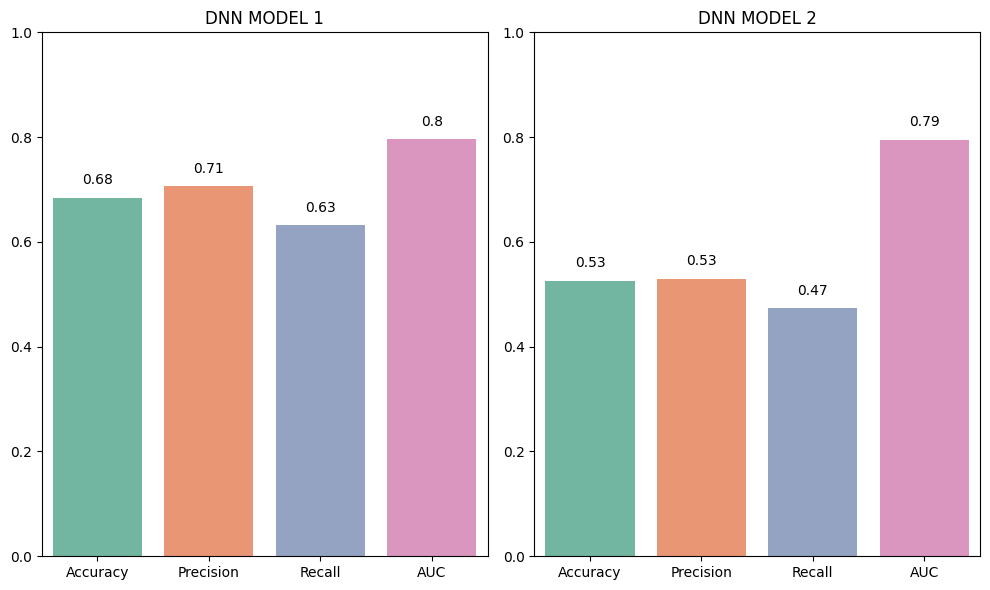

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Define the metrics and models
models = ['Accuracy','Precision','Recall','AUC']

accuracy_values = [acc,pre,rec,auc]
accuracy_values2 = [acc2,pre2,rec2,auc2]


# Plotting
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=accuracy_values, palette='Set2')
plt.title('DNN MODEL 1')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1

# Add text labels for accuracy values
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

# Plot precision
plt.subplot(1, 2, 2)
sns.barplot(x=models, y=accuracy_values2, palette='Set2')
plt.title('DNN MODEL 2')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1


# Add text labels for precision values
for i, v in enumerate(accuracy_values2):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()

2/2 [==============================] - 1s 201ms/step


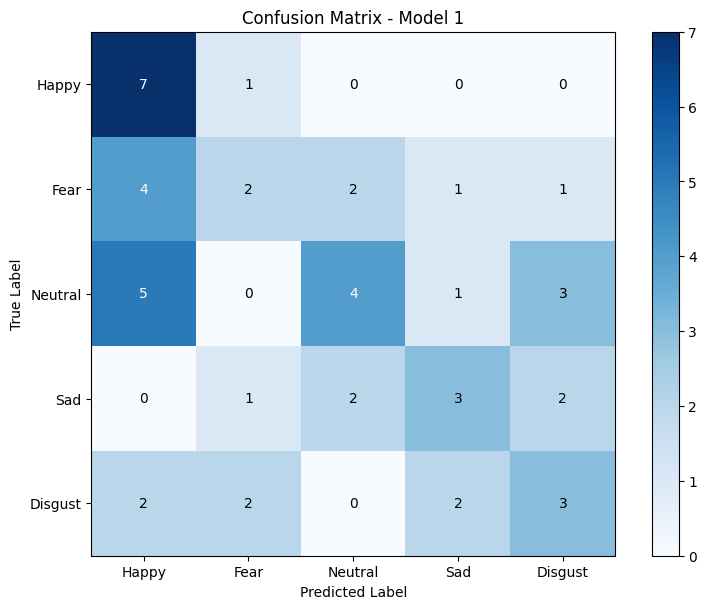

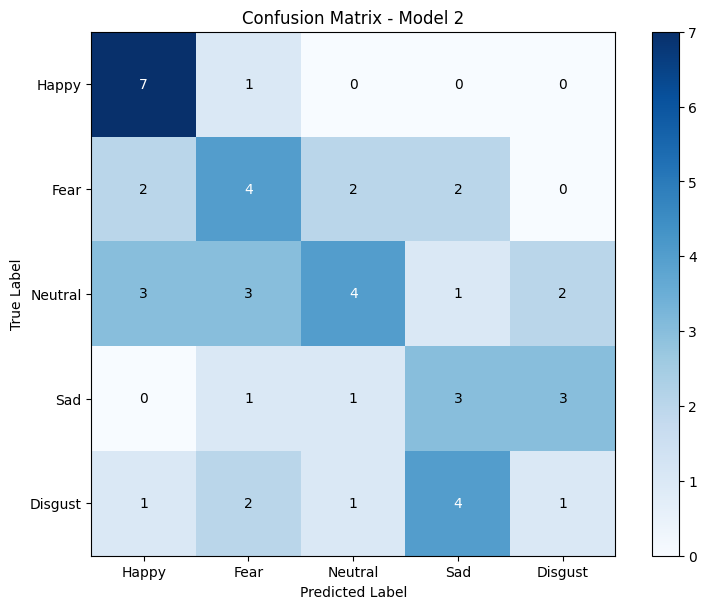

In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, labels, title):

  labels = ["Happy", "Fear", "Neutral", "Sad", "Disgust"]

  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap='Blues')  # Use a colormap for better visualization
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels)  # Rotate x-axis labels for better readability
  plt.yticks(tick_marks, labels)

  # Normalize confusion matrix values to display percentages instead of raw counts

  thresh = cm.max() / 2.
  for i in range(len(cm)):
    for j in range(len(cm[0])):
      plt.text(j, i, format(cm[i, j]),
               ha="center", va="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

# Calculate confusion matrices
y_pred1 = model.predict(x_test)
y_pred_classes1 = np.argmax(y_pred1, axis=1)
cm1 = confusion_matrix(y_test.argmax(axis=1), y_pred_classes1)

y_pred2 = model2.predict(x_test)
y_pred_classes2 = np.argmax(y_pred2, axis=1)
cm2 = confusion_matrix(y_test.argmax(axis=1), y_pred_classes2)

# Create separate confusion matrix plots with informative titles
plot_confusion_matrix(cm1, list(set(y_test.argmax(axis=1))), "Confusion Matrix - Model 1")
plot_confusion_matrix(cm2, list(set(y_test.argmax(axis=1))), "Confusion Matrix - Model 2")
